<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT


## Title : Data Visualization

#### Name: Chuay Xiang Ze

#### IC Number: 021224070255

#### Date : 27/06/2023

#### Introduction : Learning about how to visualize data using Matplotlib



#### Conclusion :






# Data Visualization

<img src='https://matplotlib.org/_static/logo2.svg' style="width: 400px;">

[Matplotlib](https://matplotlib.org/) is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenience when one needs to regenerate the figure with updated data or change its appearance. Also, such way of generating figures can provide automation to softwares and applications.

More information at the Matplotlib web page: http://matplotlib.org/

In [ ]:
import matplotlib.pyplot as plt

# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

In [ ]:
import numpy as np

## Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

<img src="https://i.stack.imgur.com/HZWkV.png"  style="width: 250px;">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and each ``Figure`` can contain multiple ``Axes``. 

Most plotting occurs on an ``Axes``. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``Subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``. These contain the ticks, tick locations, labels, etc. In this module, we will mostly control ticks, tick labels, and data limits through other mechanisms, so we will not touch the individual ``Axis`` part of things all that much. However, it is worth mentioning here to explain where the term ``Axes`` comes from.

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. 

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

### Simple Example

A simple figure with MATLAB-like plotting API:

In [ ]:
# make some data
x = np.linspace(0, 20, 10)
y = x ** 2
print(x,y)

[ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ] [  0.           4.9382716   19.75308642  44.44444444  79.01234568
 123.45679012 177.77777778 241.97530864 316.04938272 400.        ]


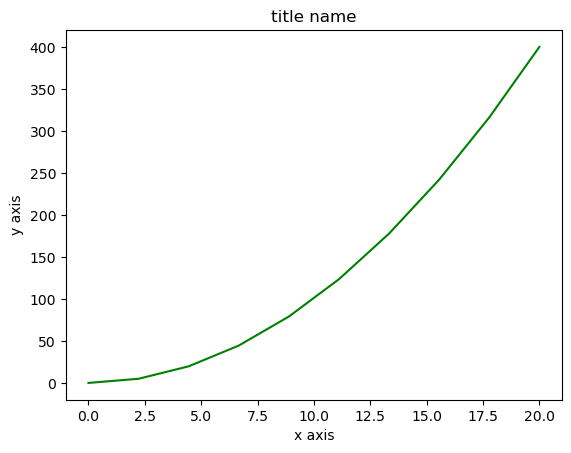

In [ ]:
plt.figure()     # this creates the figure, but usually this is not necessary
plt.plot(x, y, 'g-')     # line plotting
plt.xlabel('x axis')         # x-label text
plt.ylabel('y axis')         # y-label text
plt.title('title name')      # title text
plt.show()              # display the figure

Creating subplots allow us to add a few plots into a single figure. This is particularly useful if a loop is needed to cycle through the data for plotting:

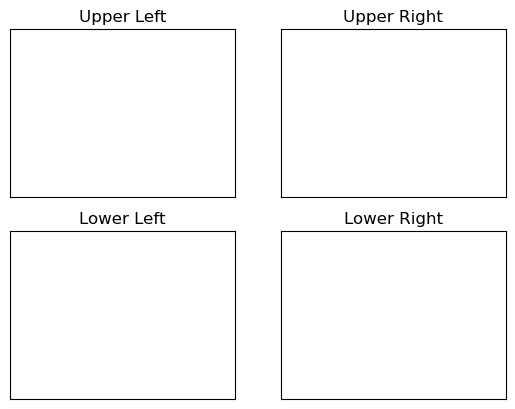

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)  # creates a plot with 2x2 subplots
axes[0,0].set(title='Upper Left')   # set the title for axes at position (0,0)
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
# (uncomment the relevant rows below)
for ax in axes.flat:

    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

The two coordinates in `axes` specify the row and column indices. For instance, `axes[0,1]` accesses the subplot axes at row 0 and column 1, which is the one at the upper right side.

Plots can also be customized to have different line colours and line patterns.

In this example, we have a look at another way how subplots can be accessed directly via the main `plt` object. To draw on different subplots, the `plot` function needs to be called for each subplot.

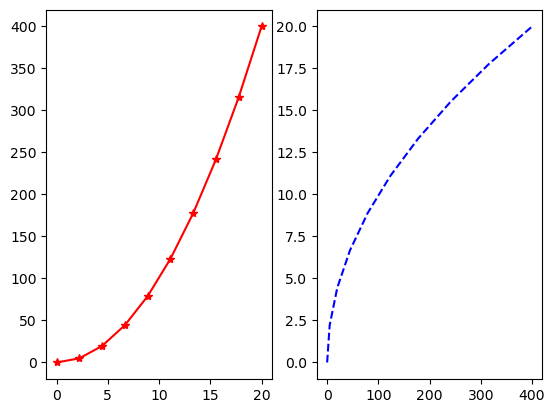

In [ ]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r*-')      # what do you think r*- means? it's related ot the colour and line patterns
plt.subplot(1,2,2)
plt.plot(y, x, 'b--');     # what about b-- ?

The good thing about this MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has minumum coding overhead for simple plots. 

However, the MATLAB compatible API has limitations and it may be difficult to have advanced control over figures. (Simple figures still bearable!)

Instead, it is recommended to learn and use matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._axes.Axes'>


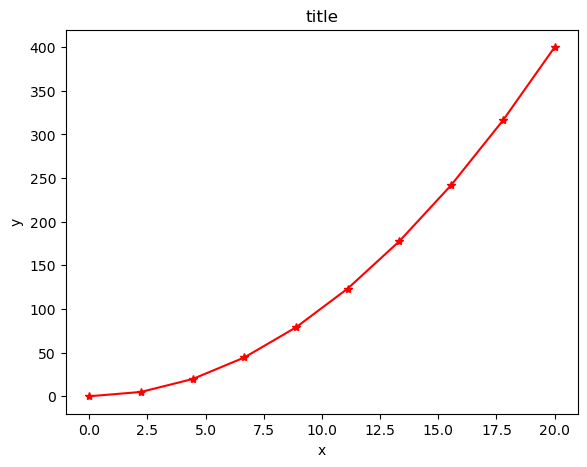

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
print(type(fig), type(axes))              # fig and axes are both different objects

axes.plot(x, y, 'r*-')     # the 3rd parameter: r means red, * means a star marker, - is a solid line

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

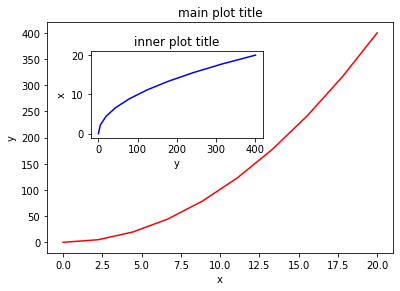

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes, oh cool! plot in a plot

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('main plot title')

# you can even make inset figures (figure in a figure)
axes2.plot(y, x, 'b')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('inner plot title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many *axis layout managers* in matplotlib. A firm favorite is `subplots`, which can be used like this:

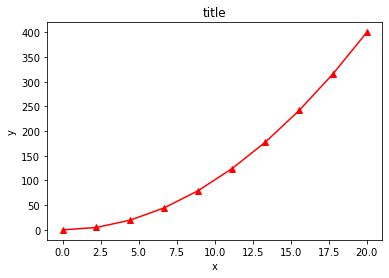

In [ ]:
fig, axes = plt.subplots()    # by default 1 subplot

axes.plot(x, y, 'r^-')       # red, triangular marker, solid line
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

To create subplots, there are 2 useful parameters:

* `figsize` parameter takes a tuple of width and height values, in screen inches.
* `nrows` and `ncols` define the number of rows and columns of subplots (respectively) that you intend to create.

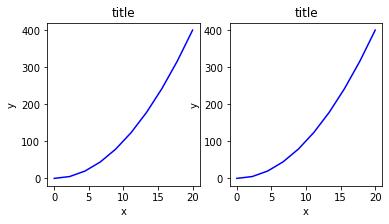

In [ ]:
fig, axes = plt.subplots(figsize=(6,3), nrows=1, ncols=2)      # 1x2 subplots, figure dimension (6,3)

for ax in axes:     # this loops thru all subplot axes
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content caused by labels and axes:

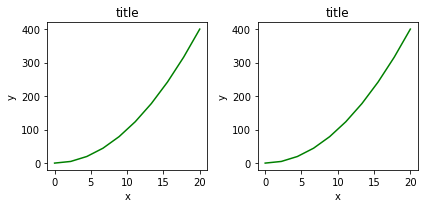

In [ ]:
fig, axes = plt.subplots(figsize=(6,3), nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

**Quick Exercise 1** Create 5 subplots in a row. Each subplot contains a line of a function $y=x^n$ and that $n$ increases from 1 to 5.

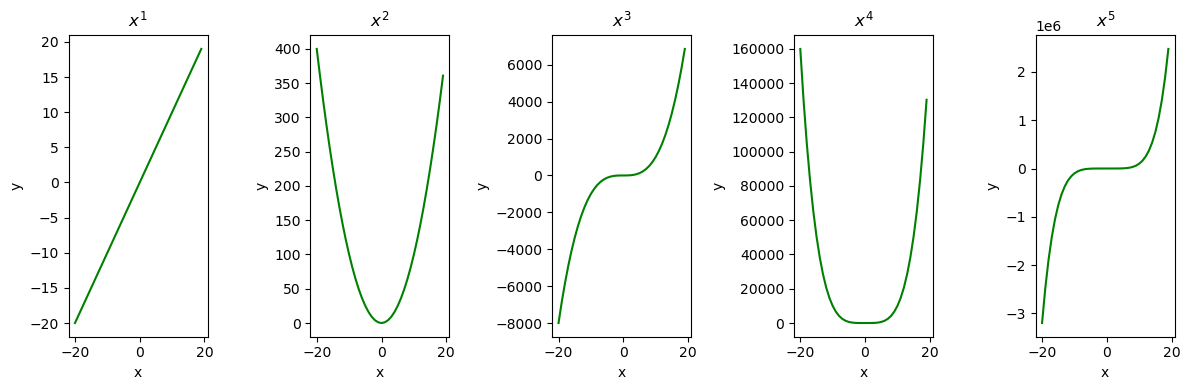

In [ ]:
x = np.arange(-20,20,1)
n = 1

# write your code here
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=5)

for i, ax in enumerate(axes):
    y = x ** (n)
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(fr'$x^{i+1}$')
    n += 1
    
    
fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` controls the aspect ratio: width and height (in inches), and `dpi` is the dots-per-inch (pixel per inch) resolution. To create a 800x400 pixel, 100 dots-per-inch figure, we can do this: 

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function.

### Saving figures

To save a figure to a file we can use the `savefig` method of the `Figure` object:

In [ ]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [ ]:
fig.savefig("filename_dpi600.png", dpi=600)

Compare the two file sizes. The second file was saved at a higher quality level (600 dpi), hence a much larger file size.  

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number of formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, it is recommended to use the PDF format whenever possible. In some cases, PGF can also be good alternative.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how to decorate a figure with titles, axis labels, and legends. These are also essential components of a figure.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:
```python
ax.set_title("title");
```

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:
```python
ax.set_xlabel("x")
ax.set_ylabel("y")
```

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:
```python
ax.legend(["curve1", "curve2", "curve3"])
```

The method described above follows the MATLAB API. It is somewhat prone to errors and inflexible if curves are added to or removed from the figure (resulting in wrongly labeled curves).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 
```python
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();
```

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

```python
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available
```

The following figure shows how to use the figure title, axis labels and legends described above:

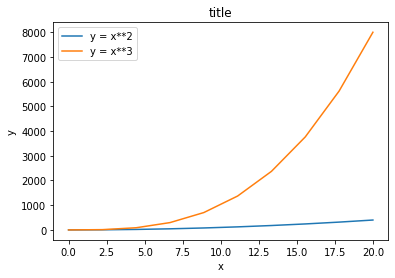

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

Notice how changing axes settings, legend settings, titles, labels, (as in these lines), have no effect until the `plot()` function is executed again?

### Formatting text: LaTeX, fontsize, font family

There are other decorative features. 

There are ways that we can add math (by [LaTeX formatted text](https://en.wikipedia.org/wiki/LaTeX)), and also adjust the font size or font type to an appropriate size that you wish.

To type in LaTeX, all we need to do is to use dollar symbols to encapsulate LaTeX code anywhere in text (legend, title, label, etc.). For example, `$y=x^3$` prints us $y=x^3$.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up LaTeX code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

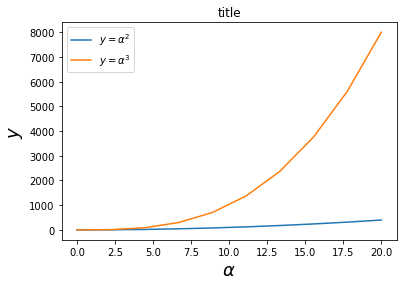

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [ ]:
# Update the matplotlib configuration parameters:
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serfi'})

NameError: name 'x' is not defined

findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font family 'serfi' not found.
findfont: Font f

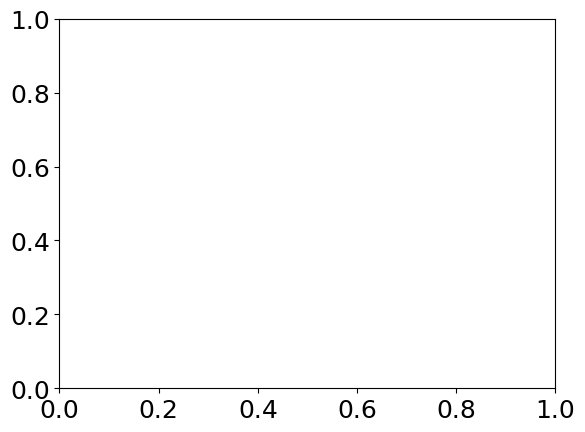

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the STIX fonts: 

In [ ]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

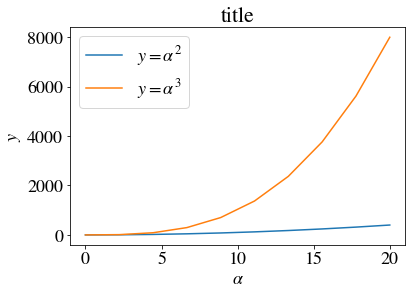

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### Setting colors, linewidths, linetypes

#### Colors

This is, perhaps, the most important piece of "vocabulary" in matplotlib. Given that matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse" are valid. See the [full list](https://www.w3schools.com/colors/colors_names.asp) of the 140 colornames. For those of us who may not be able to spell these names correctly, even "grey" is allowed eventhough "gray" appears in that list of colornames. All of these colornames are case-insensitive.


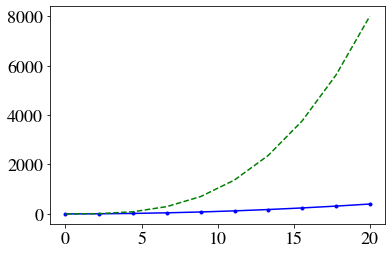

In [ ]:
# MATLAB style line color and style 
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

In [ ]:
x = np.linspace(0, 20, 10)
y = x ** 2

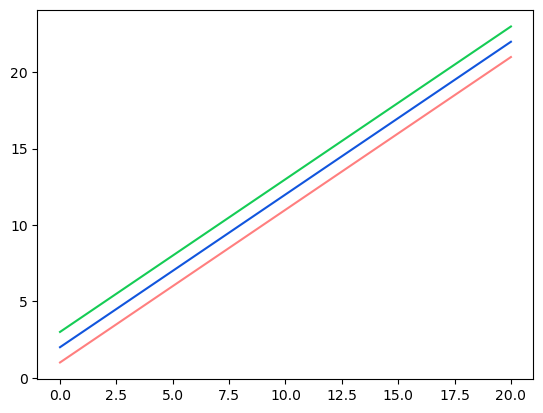

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### Line and marker styles

Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. 

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

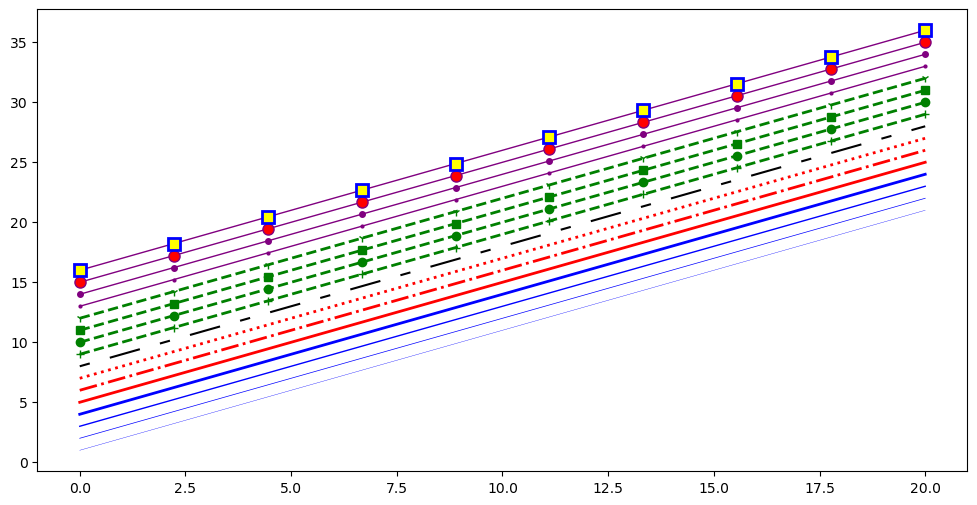

In [ ]:
# Here's a huge collection of line plots of all kinds of styles!
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified, but usually this whole lot is more than enough!

marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing      ||" "       |  nothing      ||""        |  nothing

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to create good quality figures. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes range:

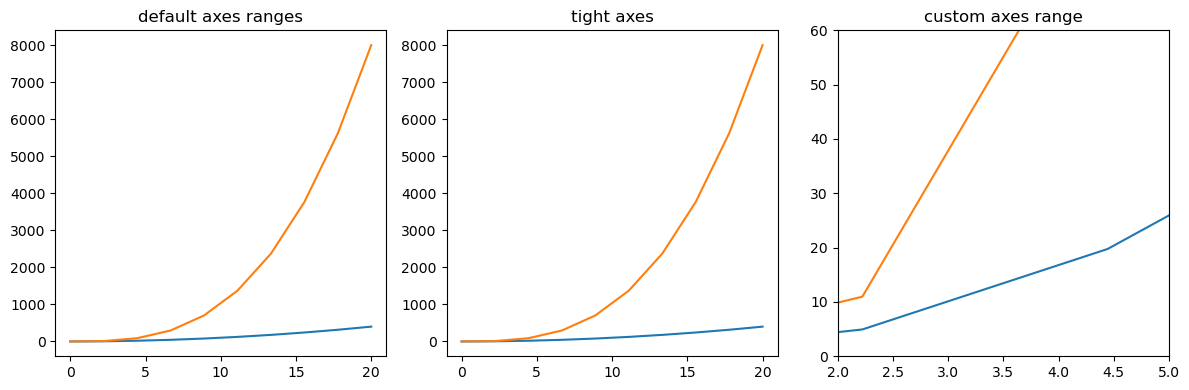

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

fig.tight_layout()

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

[  0.           4.9382716   19.75308642  44.44444444  79.01234568
 123.45679012 177.77777778 241.97530864 316.04938272 400.        ]
[1.00000000e+00 9.22781435e+00 8.51525577e+01 7.85771994e+02
 7.25095809e+03 6.69104951e+04 6.17437627e+05 5.69759980e+06
 5.25763932e+07 4.85165195e+08]


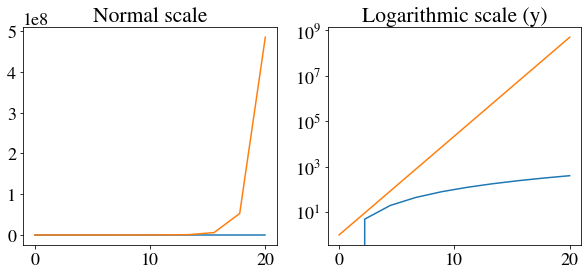

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
print(x**2)
print(np.exp(x))
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

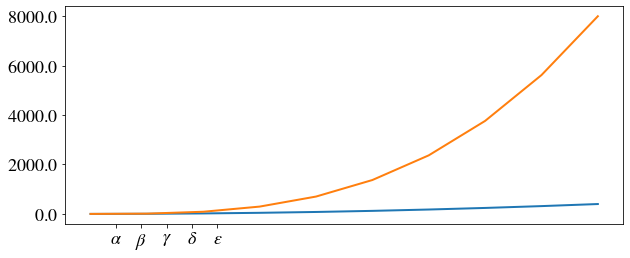

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 2000, 4000, 6000, 8000]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

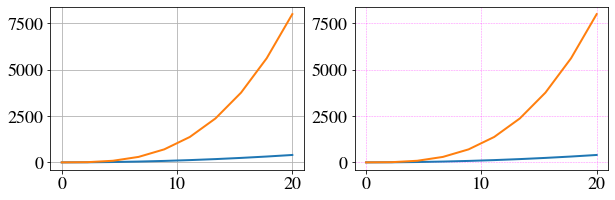

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)            # turn grid on

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='magenta', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

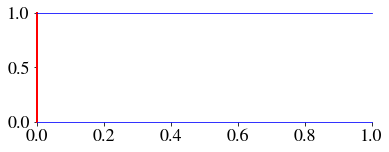

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

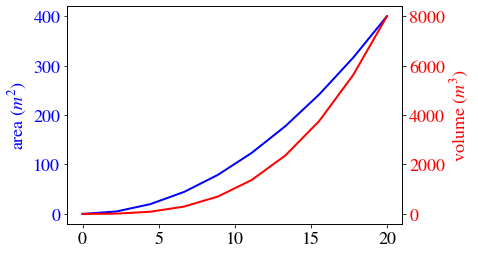

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

The x and y axes can both be set to zero, allowing the negative quadrants to show up.

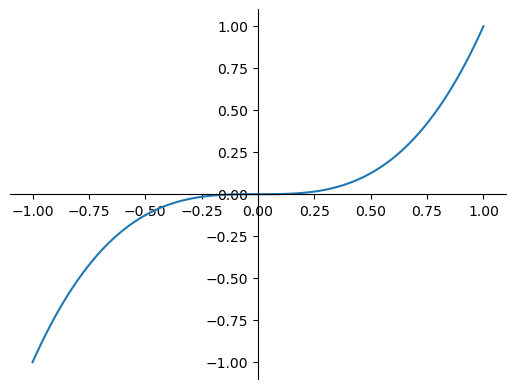

In [ ]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-1, 1., 100)
ax.plot(xx, xx**3);

**Quick Exercise 2**
 
Given a simple dataset below:

Time (decade): 0, 1, 2, 3, 4, 5, 6.<br />
CO2 concentration (ppm): 250, 265, 272, 260, 300, 320, 389

* Create a line graph of CO2 versus time. View the plot.
* Re-draw the graph with a blue dashed line.
* Add a title and axis titles to the plot.

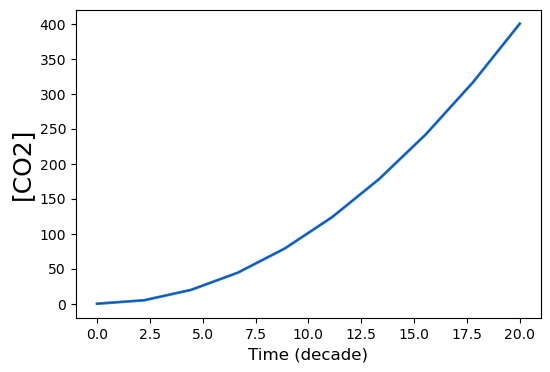

In [148]:
# write your codes here

xtime = list(range(0, 7))
yconc = [250, 265, 272, 260, 300, 320, 389]
fig6, axes6 = plt.subplots(figsize=(4,3))

axes6.plot(xtime, yconc, 'b--')
axes6.set_title('Concentration of CO2 versus time')
axes6.set_xlabel('Time (decade)')
axes6.set_ylabel('[CO2]')

**Quick Exercise 3**

Continuing with the same data plot above, add a second line using the following data:

Temp (°c): 14.1, 15.5, 16.3, 18.1, 17.3, 19.1, 20.2

Then, save the output (using Python code) to a PDF file.

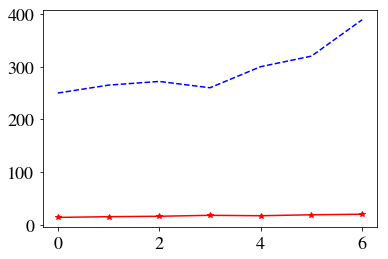

In [78]:

# write your codes here
xtime = list(range(0, 7))
yconc = [250, 265, 272, 260, 300, 320, 389]
fig6, axes6 = plt.subplots(figsize=(6,6))

axes6.plot(xtime, yconc, 'b--')
axes6.set_title('Concentration of CO2 versus time')
axes6.set_xlabel('[Time (decade)]')
axes6.set_ylabel('[CO2 (ppm)]', color='blue')
    
ytemp = [14.1, 15.5, 16.3, 18.1, 17.3, 19.1, 20.2]
axes7 = axes6.twinx()
axes7.plot(xtime, ytemp, color='red', marker='o', markersize=4)
axes7.set_ylabel('[Temp (°C)]', color='red')


### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are shown below:

In [58]:
n = np.array([0,1,2,3,4,5])

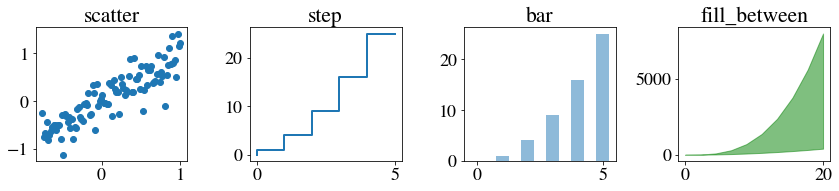

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

xx = np.linspace(-0.75, 1., 100)
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

fig.tight_layout()

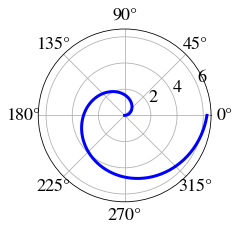

In [60]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

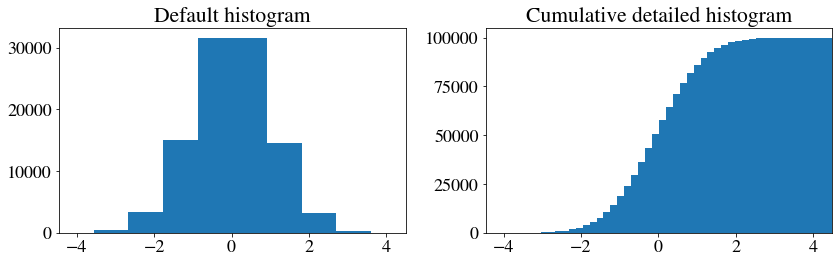

In [35]:
# Histograms
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

fig.tight_layout()

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis labels, texts and titles:

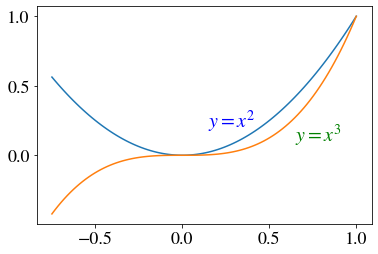

In [61]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager. We have used `subplots` earlier, but some others you can try are: `subplot2grid` or `gridspec`.

#### subplots

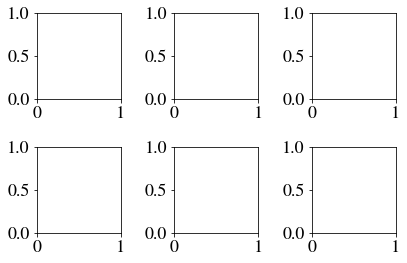

In [37]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

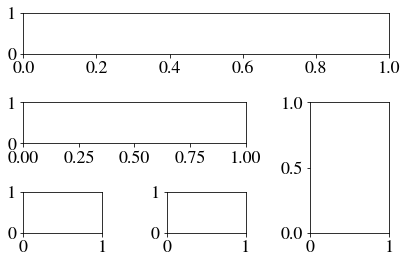

In [38]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [39]:
import matplotlib.gridspec as gridspec

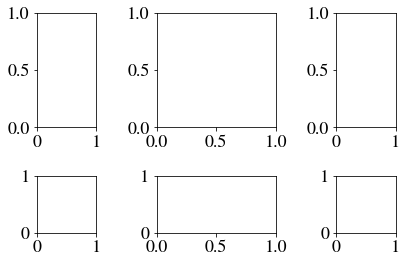

In [40]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

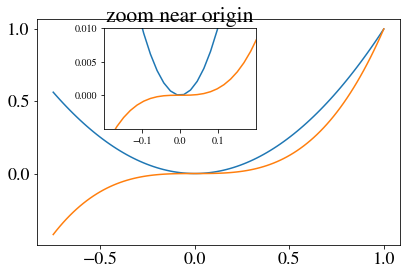

In [62]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.27, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

inset_ax.tick_params(axis='both', labelsize=10)

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Plotting with pandas plot functions

Pandas library has some basic plotting functions that can help us get the job done without the hassle of constructing plots with matplotlib (it actually relies on bindings with matplotlib). However, they are quite basic types and you may not be able to customize much.

Let's load back our Malaysian states area data...with additional state GDP stats.

In [11]:
import pandas as pd

matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

states = ['Johor','Kedah','Kelantan','Melaka', 
          'Negeri Sembilan','Pahang','Perak','Perlis',
          'Penang','Sabah', 'Sarawak','Selangor','Terengganu']
area = [19210,9500,15099,1664,6686,36137,21035,
        821,1048,73631,124450,8104,13035]
gdp = [116.68, 40.60, 23.02, 37.27, 42.39, 52.45, 67.63, 5.64, 81.28, 80.17, 121.41, 280.70, 32.27]   # in million MYR
state_area = list(zip(states, area))

df = pd.DataFrame(data = state_area, columns=['State', 'Area'])

To plot bar charts, use `plot.bar()` which does the job with minimum fuss. However, you still need to format the ticks, labels and titles.

10    124450
9      73631
5      36137
6      21035
0      19210
2      15099
12     13035
1       9500
11      8104
4       6686
3       1664
8       1048
7        821
Name: Area, dtype: int64


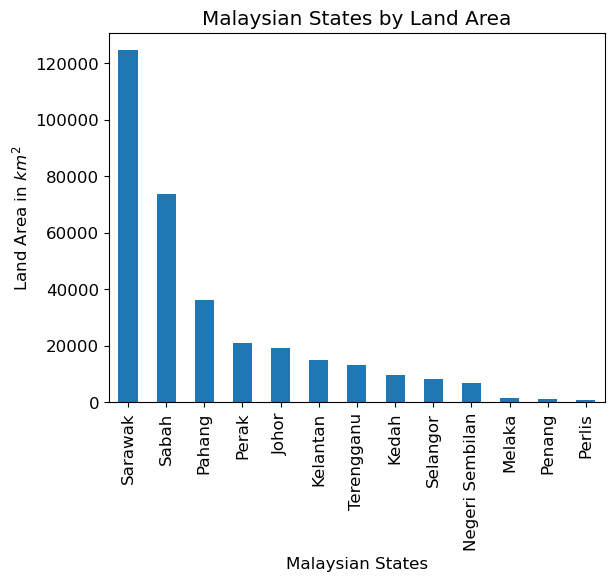

In [12]:
df = df.sort_values('Area',ascending=False)

df['Area'].plot.bar()
print(df['Area'])

plt.xticks(np.arange(13), (df['State']))   # the State column is used as labels
plt.xlabel('Malaysian States')
plt.ylabel('Land Area in $km^2$')
plt.title('Malaysian States by Land Area')
plt.show()

Alternatively, you can use a pie chart to show the same thing, although it is normally not that recommended from the information visualization point of view because it tends to give a misleading impression. It is difficult for us to compare the pie slices with our naked eye.

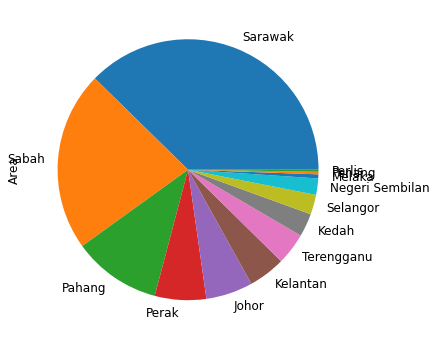

In [11]:
plt.figure(figsize=(6,6))
df['Area'].plot.pie(labels=df['State']) 
plt.show()

In [12]:
matplotlib.pyplot.pie?

In [13]:
list(map(list, zip(*[states, gdp, area])))

[['Johor', 116.68, 19210],
 ['Kedah', 40.6, 9500],
 ['Kelantan', 23.02, 15099],
 ['Melaka', 37.27, 1664],
 ['Negeri Sembilan', 42.39, 6686],
 ['Pahang', 52.45, 36137],
 ['Perak', 67.63, 21035],
 ['Perlis', 5.64, 821],
 ['Penang', 81.28, 1048],
 ['Sabah', 80.17, 73631],
 ['Sarawak', 121.41, 124450],
 ['Selangor', 280.7, 8104],
 ['Terengganu', 32.27, 13035]]

We can also plot scatter plots, which are commonly used to show the relationship between two attributes in data. In our example data, we have two attributes of the states: GDP and Area. If we want to find out how the states pull in their GDP with respect to their land sizes (assuming we think that larger states should have more resources and land to earn more), the scatter plot would be most useful. 

In [14]:
# prepare another dataframe containing all information
state_info = pd.DataFrame(list(map(list, zip(*[states, gdp, area]))), columns=['State', 'GDP', 'Area'])
state_info

,State,GDP,Area
0,Johor,116.68,19210
1,Kedah,40.60,9500
2,Kelantan,23.02,15099
3,Melaka,37.27,1664
4,Negeri Sembilan,42.39,6686
5,Pahang,52.45,36137
6,Perak,67.63,21035
7,Perlis,5.64,821
8,Penang,81.28,1048
9,Sabah,80.17,73631


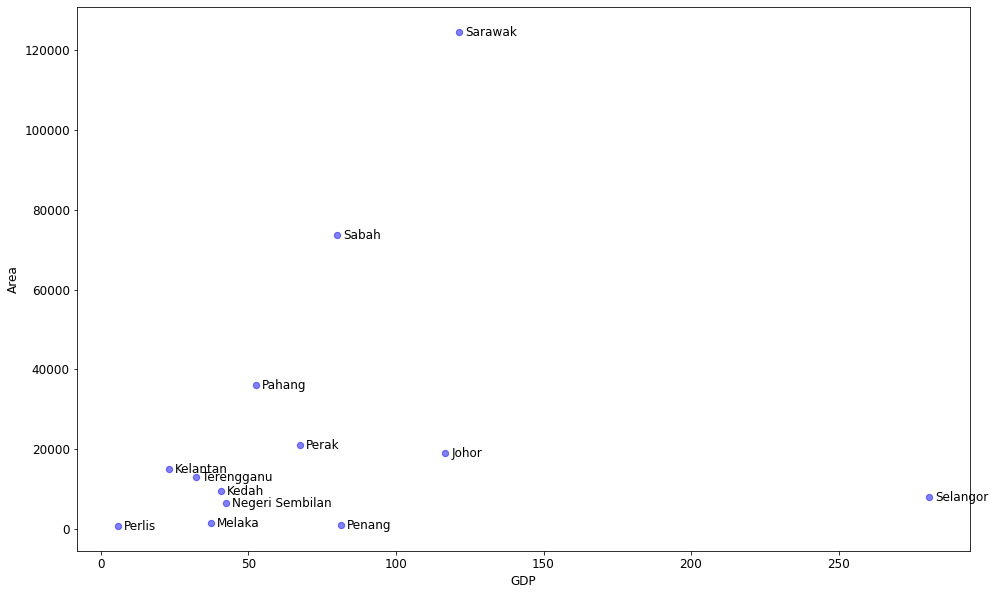

In [15]:
plt.rcParams["figure.figsize"] = [16,10]   # make the figure bigger
state_info.plot.scatter('GDP', 'Area', c='b', s=40, alpha=0.5, linewidth=1)

# provide some text annotations
offset = 2
for i, txt in enumerate(state_info['State']):
    plt.annotate(txt, (state_info['GDP'][i]+offset, state_info['Area'][i]-500*offset))


plt.show()

### Advanced Topic: Backends

Matplotlib has a number of "backends" which are responsible for rendering graphs. The different backends are able to generate graphics with different formats and display/event loops. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate image files (e.g. with the `savefig` function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures. 

A list of available backends are:

In [16]:
print(matplotlib.rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


The default backend, called `agg`, is based on a library for raster graphics which is great for generating raster formats like PNG.

Normally we don't need to bother with changing the default backend; but sometimes it can be useful to switch to, for example, PDF or GTKCairo (if you are using Linux) to produce high-quality vector graphics instead of raster based graphics. 

#### The IPython notebook inline backend

When we use IPython notebook it is convenient to use a matplotlib backend that outputs the graphics embedded in the notebook file. To activate this backend, somewhere in the beginning on the notebook, we add:

    %matplotlib inline

It is also possible to activate inline matplotlib plotting with:

    %pylab inline

The difference is that `%pylab inline` imports a number of packages into the global address space (scipy, numpy), while `%matplotlib inline` only sets up inline plotting. Using `%matplotlib inline` is recommended since it is tidier and you have more control over which packages are imported and how. Commonly, scipy and numpy are imported separately with:

    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt

The inline backend has a number of configuration options that can be set by using the IPython magic command `%config` to update settings in `InlineBackend`. For example, we can switch to SVG figures or higher resolution figures with either:

    %config InlineBackend.figure_format='svg'
     
or:

    %config InlineBackend.figure_format='retina'
    
For more information, type:

    %config InlineBackend

## Plotting Preparation

Function          | Description                                                                                
:-----------------|:----------------------------------------------------------
`autoscale`       | Autoscale the axis view to the data (toggle).
`axes`            | Add an axes to the figure.                                                                 
`axis`            | Convenience method to get or set axis properties.
`cla`             | Clear the current axes.                                                                    
`clf`             | Clear the current figure.                                                                  
`clim`            | Set the color limits of the current image.                                                 
`delaxes`         | Remove an axes from the current figure.                                                    
`locator_params`  | Control behavior of tick locators.                                                         
`margins`         | Set or retrieve autoscaling margins.
`figure`          | Creates a new figure.                                                                      
`gca`             | Return the current axis instance.                                                          
`gcf`             | Return a reference to the current figure.                                                  
`gci`             | Get the current colorable artist.                                                          
`hold`            | Set the hold state.                                                                        
`ioff`            | Turn interactive mode off.                                                                 
`ion`             | Turn interactive mode on.                                                                  
`ishold`          | Return the hold status of the current axes.                                                
`isinteractive`   | Return status of interactive mode.                                                         
`rc`              | Set the current rc params.                                                                 
`rc_context`      | Return a context manager for managing rc settings.                                         
`rcdefaults`      | Restore the default rc params.                                                             
`savefig`         | Save the current figure.                                                                   
`sca`             | Set the current Axes instance.                                                     
`sci`             | Set the current image.                                                                     
`set_cmap`        | Set the default colormap
`setp`            | Set a property on an artist object
`show`            | Display a figure
`subplot`         | Return a subplot axes positioned by the given grid definition.                             
`subplot2grid`    | Create a subplot in a grid.                                                                
`subplot_tool`    | Launch a subplot tool window for a figure.                                                 
`subplots`        | Create a figure with a set of subplots already made.                                       
`subplots_adjust` | Tune the subplot layout.                                                                   
`switch_backend`  | Switch the default backend.                                                                
`tick_params`     | Change the appearance of ticks and tick labels.                                            
`ticklabel_format`| Change the ScalarFormatter used by default for linear axes.           
`tight_layout`    | Automatically adjust subplot parameters to give specified padding.                         
`xkcd`            | Turns on [XKCD](http://xkcd.com/) sketch-style drawing mode.                             
`xlabel`          | Set the *x* axis label of the current axis.                                                
`xlim`            | Get or set the *x* limits of the current axes.                                             
`xscale`          | Set the scaling of the *x*-axis.                                                           
`xticks`          | Get or set the *x*-limits of the current tick locations and labels.                        
`ylabel`          | Set the *y* axis label of the current axis.                                                
`ylim`            | Get or set the *y*-limits of the current axes.                                             
`yscale`          | Set the scaling of the *y*-axis.                                                           
`yticks`          | Get or set the *y*-limits of the current tick locations and labels.                        

## Plotting Functions

Function          | Description
:-----------------|:--------------------------------------------
`acorr`           | Plot the autocorrelation of *x*
`bar`             | Make a bar plot
`barbs`           | Plot a 2-D field of barbs
`barh`            | Make a horizontal bar plot
`boxplot`         | Make a box and whisker plot
`broken_barh`     | Plot horizontal bars
`cohere`          | Plot the coherence between *x* and *y*
`contour`         | Plot contours
`contourf`        | Plot filled contours
`csd`             | Plot cross-spectral density
`errorbar`        | Plot an errorbar graph
`eventplot`       | Plot identical parallel lines at specific positions
`fill`            | Plot filled polygons
`fill_between`    | Make filled polygons between two curves
`fill_betweenx`   | Make filled polygons between two horizontal curves
`hexbin`          | Make a hexagonal binning plot
`hist`            | Plot a histogram
`hist2d`          | Make a 2D histogram plot
`imshow`          | Display an image on the axes
`loglog`          | Make a plot with log scaling on both the *x* and *y* axis
`matshow`         | Display an array as a matrix in a new figure window
`pcolor`          | Create a pseudocolor plot of a 2-D array
`pcolormesh`      | Plot a quadrilateral mesh
`pie`             | Plot a pie chart
`plot`            | Plot lines and/or markers
`plot_date`       | Plot with data with dates
`polar`           | Make a polar plot
`psd`             | Plot the power spectral density
`quiver`          | Plot a 2-D field of arrows
`scatter`         | Make a scatter plot of x vs y
`semilogx`        | Make a plot with log scaling on the *x* axis 
`semilogy`        | Make a plot with log scaling on the *y* axis
`specgram`        | Plot a spectrogram
`spy`             | Plot the sparsity pattern on a 2-D array
`stackplot`       | Draws a stacked area plot
`stem`            | Create a stem plot
`step`            | Make a step plot
`streamplot`      | Draws streamlines of a vector flow
`tricontour`      | Draw contours on an unstructured triangular grid
`tricontourf`     | Draw filled contours on an unstructured triangular grid
`tripcolor`       | Create a pseudocolor plot of an unstructured triangular grid
`triplot`         | Draw a unstructured triangular grid as lines and/or markers
`xcorr`           | Plot the cross-correlation between *x* and *y*

## Plot modifiers

Function          | Description                                                                                
:-----------------|:---------------------------------------------------------------------
`annotate`        | Create an annotation: a piece of text referring to a data point
`arrow`           | Add an arrow to the axes
`axhline`         | Add a horizontal line across the axis
`axhspan`         | Add a horizontal span (rectangle) across the axis
`axvline`         | Add a vertical line across the axes
`axvspan`         | Add a vertical span (rectangle) across the axes
`box`             | Turn the axes box on or off
`clabel`          | Label a contour plot
`colorbar`        | Add a colorbar to a plot
`grid`            | Turn the axes grids on or off
`hlines`          | Plot horizontal lines
`legend`          | Place a legend on the current axes
`minorticks_off`  | Remove minor ticks from the current plot
`minorticks_on`   | Display minor ticks on the current plot
`quiverkey`       | Add a key to a quiver plot
`rgrids`          | Get or set the radial gridlines on a polar plot
`suptitle`        | Add a centered title to the figure
`table`           | Add a table to the current axes
`text`            | Add text to the axes
`title`           | Set a title of the current axes
`vlines`          | Plot vertical lines
`xlabel`          | Set the *x* axis label of the current axis
`ylabel`          | Set the *y* axis label of the current axis"

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
